# Regression Machine Learning

The purpose of this notebook is to create a regression machine learning algorithms to be able to predict the number of bike rentals from several other features

In [1]:
# Import the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import ipywidgets as widgets
import time
from IPython.display import display, clear_output

## 1. The data was imported from a CSV into a dataframe. The first five records can be seen below

In [2]:
bike_data = pd.read_csv('data/daily-bike-share.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


The data consists of the following columns:

- **instant**: A unique row identifier
- **dteday**: The date on which the data was observed - in this case, the data was collected daily; so there's one row per date.
- **season**: A numerically encoded value indicating the season (1:spring, 2:summer, 3:fall, 4:winter)
- **yr**: The year of the study in which the observation was made (the study took place over two years - year 0 represents 2011, and year 1 represents 2012)
- **mnth**: The calendar month in which the observation was made (1:January ... 12:December)
- **holiday**: A binary value indicating whether or not the observation was made on a public holiday)
- **weekday**: The day of the week on which the observation was made (0:Sunday ... 6:Saturday)
- **workingday**: A binary value indicating whether or not the day is a working day (not a weekend or holiday)
- **weathersit**: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)
- **temp**: The temperature in celsius (normalized)
- **atemp**: The apparent ("feels-like") temperature in celsius (normalized)
- **hum**: The humidity level (normalized)
- **windspeed**: The windspeed (normalized)
- **rentals**: The number of bicycle rentals recorded.

## 2. The feature 'day' was created from the column 'dteday' and added to the dataframe

In [3]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


## 3. Descriptive analytics of the numerical columns temp, atemp, hum, windspeed and rentals

In [4]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


## 4. The data distribution of the rentals column

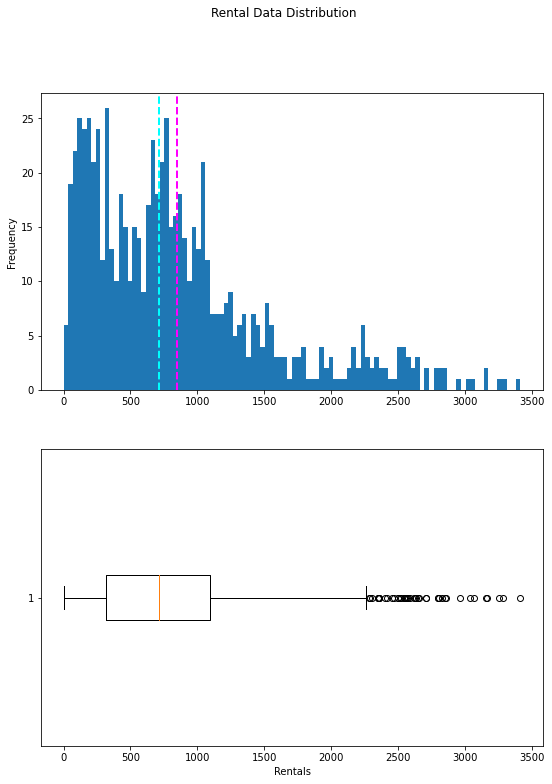

In [5]:
# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = bike_data['rentals']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

# Add a title to the Figure
fig.suptitle('Rental Data Distribution')

# Show the figure
fig.show()

## 5. The data distribution of the numerical columns temp, atemp, hum and windspeed

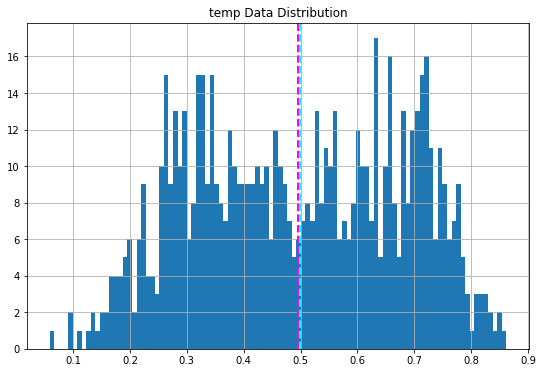

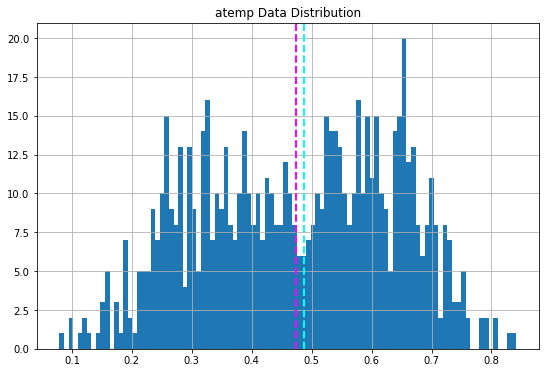

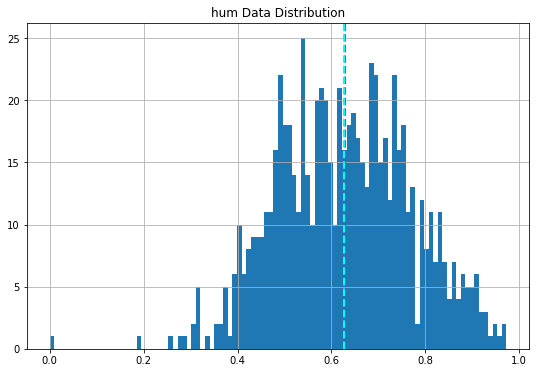

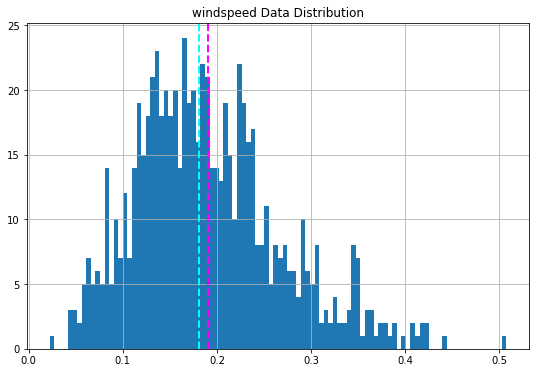

In [6]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(f'{col} Data Distribution')
plt.show()

## 6. The count of each value within the categorical columns season, mnth, holiday, weekday, workingday, weathersit, and day

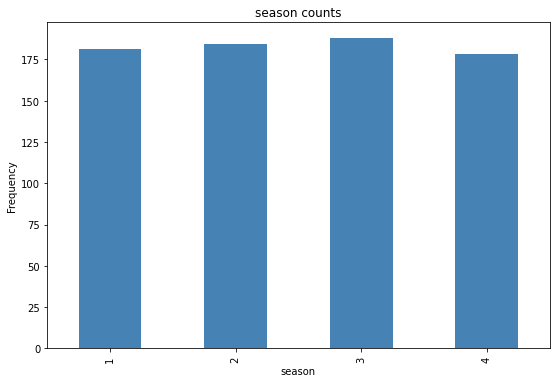

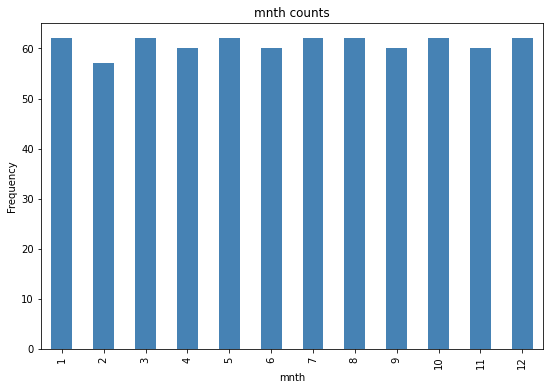

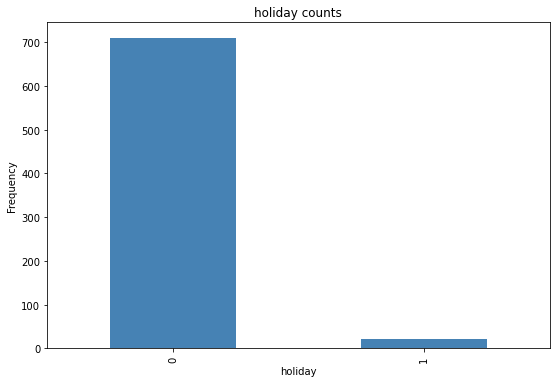

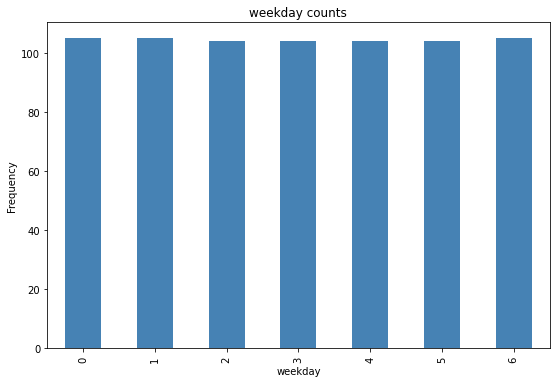

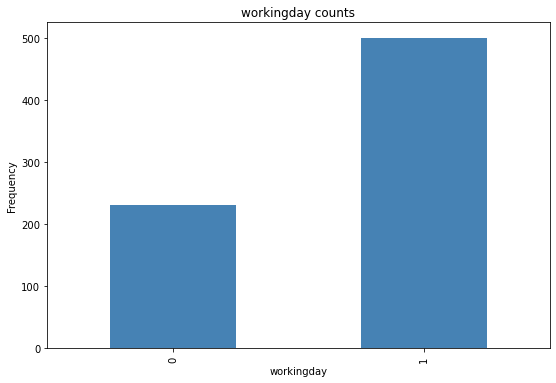

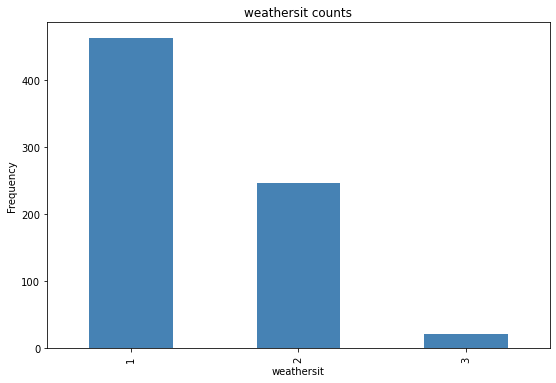

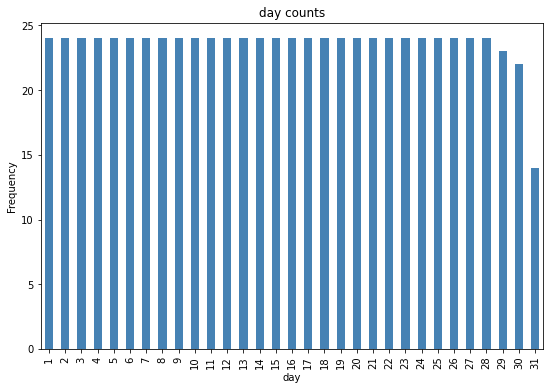

In [7]:
# plot a bar plot for each categorical feature count
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()


## 7. Scatter plots of the numerical columns against rentals that show the intersection of features, label values and the correlation statistics

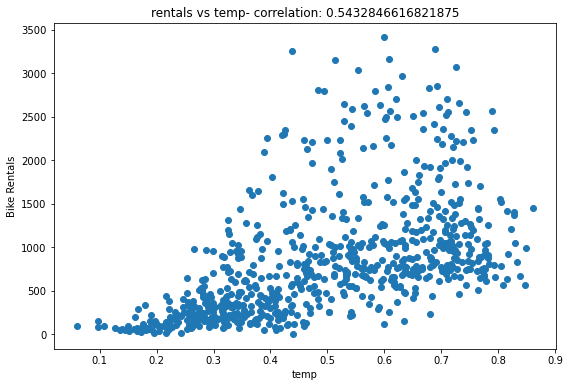

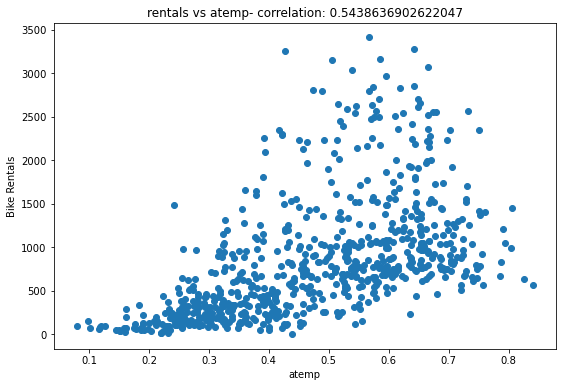

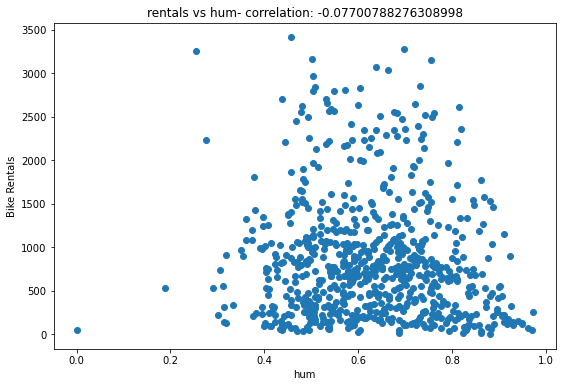

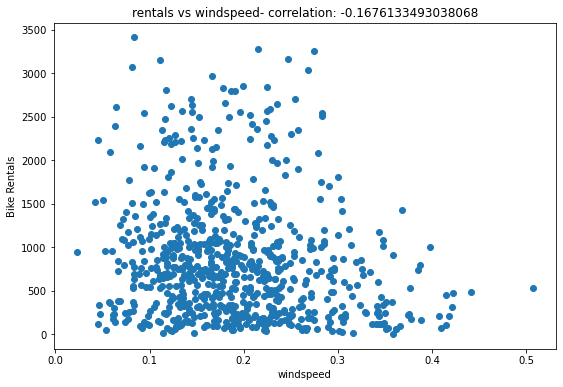

In [8]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()

## 8. Box plots that show the distribution of rental counts for each categorical column

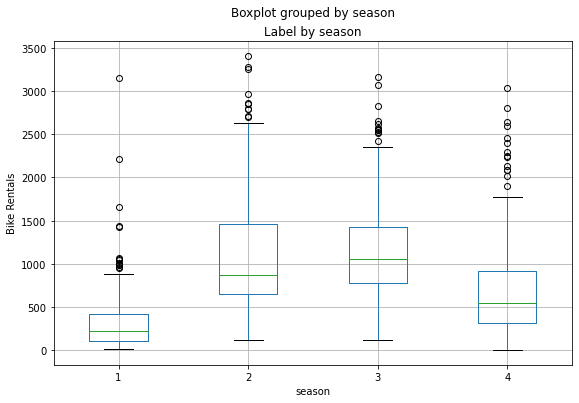

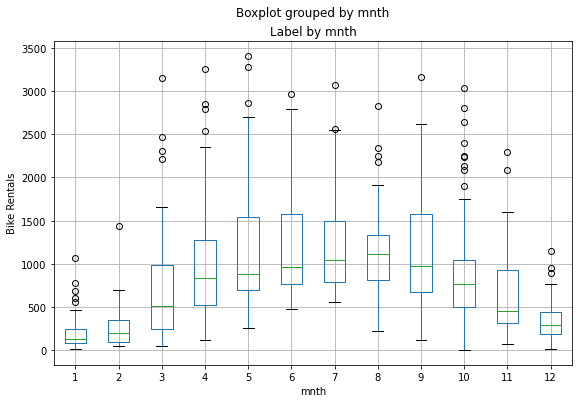

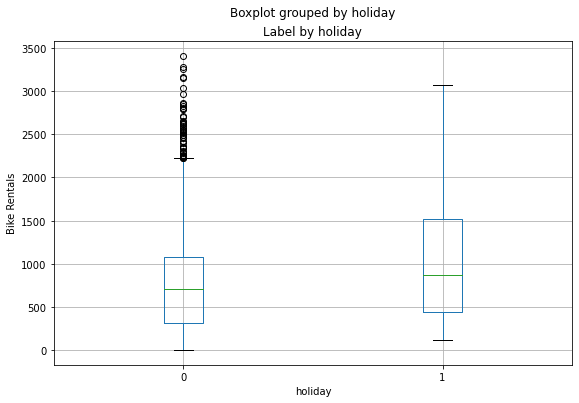

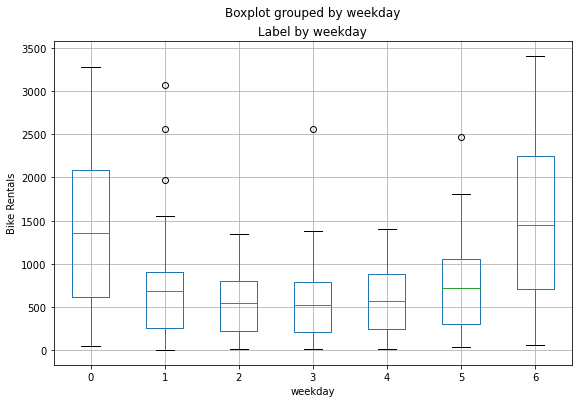

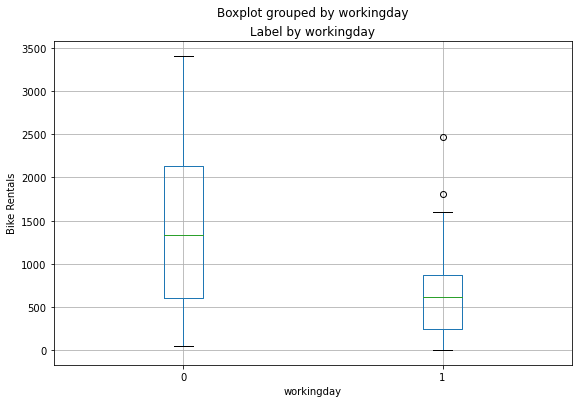

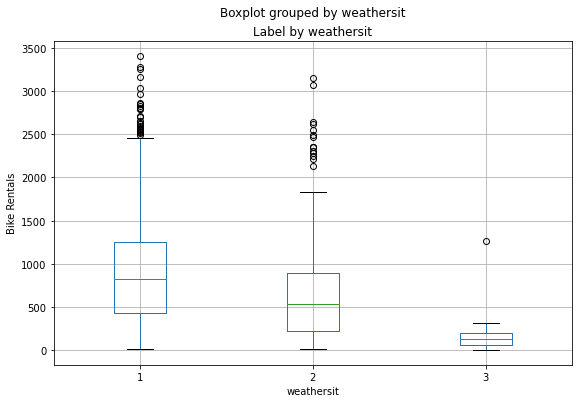

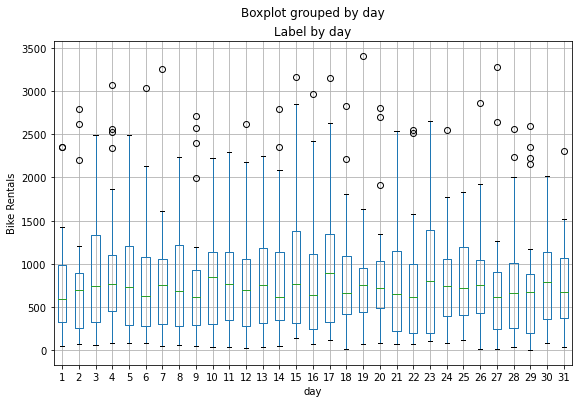

In [9]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

## 9. Seperate the features we want to use to train the model from the label we want the model to predict

The following columns appear to have a significant correlation to rentals season, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, and windspeed and are therefore are features

Rentals is the label as it is what we want to predict

In [10]:
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

## 10. Split the data randomly into a training set and testing set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.size, X_test.size))

Training Set: 5110, rows
Test Set: 2200 rows


## 11. Train a linear regression algorithm using the training dataset. The resulting model is a function that conceptually defines a line where every possible X and y value combination intersect.

In [12]:
model = LinearRegression(normalize=False).fit(X_train, y_train)
print (model)

LinearRegression()


## 12. Testing the model with the testing data set and comparing the predicted rental volumes versus the actual rental volumes

In [13]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]


## 13. A scatter plot of the predicted rental volumes versus the actual rental volumes with a trend line 

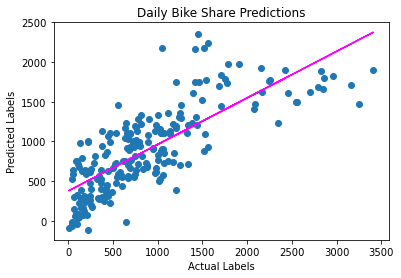

In [14]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## 14. The Mean Square Error (MSE), Root Mean Square Error (RMSE), Coefficient of Determination (usually known as *R-squared* or R<sup>2</sup>) of the linear regression model

- **Mean Square Error (MSE)**: The mean difference between predicted and actual, squared. This yields a relative metric in which the smaller the value, the better the fit of the model
- **Root Mean Square Error (RMSE)**: The square root of the MSE. This yields an absolute metric in the same unit as the label (in this case, numbers of rentals). The smaller the value, the better the model (in a simplistic sense, it represents the average number of rentals by which the predictions are wrong!)
- **Coefficient of Determination (usually known as *R-squared* or R<sup>2</sup>**: A relative metric in which the higher the value, the better the fit of the model. In essence, this metric represents how much of the variance between predicted and actual label values the model is able to explain.

In [15]:
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201972.55947035612
RMSE: 449.4135728595167
R2: 0.6040454736919186


## 15. Add pipelines to process the numerical and categorical features by scaling them and encoding them respectively and retrain the model on the processed data

In [16]:
# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression(normalize=False))])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', LinearRegression())])


## 16. Re-test the model

Predicted labels:  [1694.  985.  894. -303.  150.  150.  581.  474. 1659.  -77.]
Actual labels:  [2418  754  222   47  244  145  240  555 3252   38]
MSE: 174159.77993961138
RMSE: 417.3245498884668
R2: 0.6585706823305876


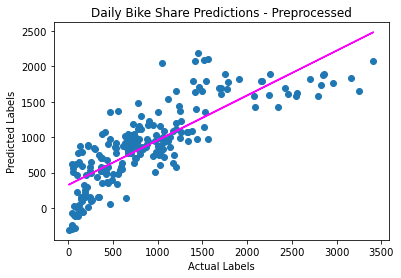

In [17]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels: ' ,y_test[:10])

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## 17. Create and train a new model from a ensemble regression algorithm called Gradient Boosting

In [18]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', GradientBoostingRegressor())])


# train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


## 18. Test the ensemble model

MSE: 105063.13186291582
RMSE: 324.1344348613948
R2: 0.7940303241276196


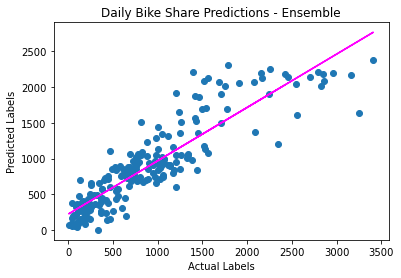

In [19]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Ensemble')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## 19. Save the ensemble model

In [20]:
filename = './models/bike-share.pkl'
joblib.dump(model, filename)

['./models/bike-share.pkl']

## 20. Now we can load the ensemble model whenever it is needed and use it to predict the number of bike rentals for a given day

In [25]:
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 122 rentals


## 21. You can input values to test the ensemble model

In [26]:
out = widgets.Output(layout={'border': '0.5px solid black'})

def predict_rentals(button):
    try:
        X_new = np.array([[season_input.value, mnth_input.value, holiday_input.value, weekday_input.value, workingday_input.value, weathersit_input.value, temp_input.value, atemp_input.value, hum_input.value, windspeed_input.value]]).astype('float64')
        result = loaded_model.predict(X_new)
        global out
        out.clear_output()
        with out:
            print('Prediction: {:.0f} rentals'.format(np.round(result[0])))
        test_button.description='Successful!'
        test_button.icon="check"
        test_button.button_style='success'
        time.sleep(3)
        # Reset the Button 
        test_button.description='Predicted Rentals'
        test_button.icon="refresh"
        test_button.button_style='primary'
    except:
        test_button.description='Failed!'
        test_button.icon="exclamation"
        test_button.button_style='danger'
        time.sleep(3)
        # Reset the Button 
        test_button.description='Predicted Iris'
        test_button.icon="refresh"
        test_button.button_style='primary'


style = {'description_width': 'initial'}

season_input = widgets.BoundedFloatText(
    value=2.0,
    min=1.0,
    max=4.0,
    step=1.0,
    description='Season:',
    disabled=False,
    style=style
)

mnth_input = widgets.BoundedFloatText(
    value=2.0,
    min=1.0,
    max=12.0,
    step=1.0,
    description='Month:',
    disabled=False,
    style=style
)

holiday_input = widgets.BoundedFloatText(
    value=1.0,
    min=0.0,
    max=1.0,
    step=1.0,
    description='Holiday:',
    disabled=False,
    style=style
)

weekday_input = widgets.BoundedFloatText(
    value=1.0,
    min=0.0,
    max=6.0,
    step=1.0,
    description='Day of the Week Number:',
    disabled=False,
    style=style
)

workingday_input = widgets.BoundedFloatText(
    value=1.0,
    min=0.0,
    max=1.0,
    step=1.0,
    description='Working Day:',
    disabled=False,
    style=style
)

weathersit_input = widgets.BoundedFloatText(
    value=1.0,
    min=1.0,
    max=3.0,
    step=1.0,
    description='Weather:',
    disabled=False,
    style=style
)

temp_input = widgets.BoundedFloatText(
    value=1.0,
    min=0.0,
    max=1.0,
    step=0.001,
    description='Temperature:',
    disabled=False,
    style=style
)

atemp_input = widgets.BoundedFloatText(
    value=1.0,
    min=0.0,
    max=1.0,
    step=0.001,
    description='Air Temperature:',
    disabled=False,
    style=style
)

hum_input = widgets.BoundedFloatText(
    value=1.0,
    min=0.0,
    max=1.0,
    step=0.001,
    description='Humidity:',
    disabled=False,
    style=style
)

windspeed_input = widgets.BoundedFloatText(
    value=1.0,
    min=0.0,
    max=1.0,
    step=0.001,
    description='Windspeed:',
    disabled=False,
    style=style
)

test_button=widgets.Button(
    description='Predicted Rentals',
    disabled=False,
    button_style='primary', 
    tooltip="Click to predict the number of rentals",
    icon='refresh')

form=widgets.VBox([season_input, mnth_input, holiday_input, weekday_input, workingday_input, weathersit_input, temp_input, atemp_input, hum_input, windspeed_input])   

button_form = widgets.VBox([test_button, out])

display_form = widgets.HBox([form, button_form])

display(display_form)

test_button.on_click(predict_rentals)